In [2]:
import importlib
import json
import os
from collections import defaultdict
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plot_utils
import seaborn as sns
from IPython.display import display
from plot_utils import TASK_TO_LABEL_MAPPING
from plot_utils import v2_colors as COLORS

import fusion_bench as fb
from fusion_bench.utils.json import load_from_json

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

PROJECT_ROOT = fb.constants.PROJECT_ROOT_PATH

/data0/users/tanganke/anaconda3/envs/fusion_bench/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def to_dataframe(results):
    """
    Convert the results to a pandas dataframe.
    """
    df_dict = defaultdict(list)
    for model_name in results.keys():
        for task, task_results in results[model_name].items():
            if task == "model_info":
                continue
            df_dict["model_name"].append(model_name)
            df_dict["task"].append(task)
            df_dict["accuracy"].append(task_results["accuracy"])
            df_dict["loss"].append(task_results["loss"])
    df = pd.DataFrame(df_dict)
    return df


def plot_heatmap(df: pd.DataFrame, figsize=(10, 5)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Get unique tasks and models in original order
    tasks = df["task"].unique()
    models = df["model_name"].unique()

    # plot the accuracy matrix
    ax: plt.Axes = axes[0]
    accuracy_pivot = df.pivot(index="model_name", columns="task", values="accuracy")
    # Reorder columns and rows to match original order
    accuracy_pivot = accuracy_pivot.reindex(index=models, columns=tasks)
    sns.heatmap(accuracy_pivot, annot=True, fmt=".2f", cmap="YlOrRd", ax=ax)
    ax.set_title("Accuracy")
    ax.set_xlabel("Task")
    ax.set_ylabel("Model")

    # plot the loss matrix
    ax: plt.Axes = axes[1]
    loss_pivot = df.pivot(index="model_name", columns="task", values="loss")
    # Reorder columns and rows to match original order
    loss_pivot = loss_pivot.reindex(index=models, columns=tasks)
    sns.heatmap(loss_pivot, annot=True, fmt=".2f", cmap="YlOrRd_r", ax=ax)
    ax.set_title("Loss")
    ax.set_xlabel("Task")
    ax.set_ylabel("Model")

    plt.tight_layout()
    plt.show()

,model_name,task,accuracy,loss
0,sun397,sun397,0.739345,0.873789
1,sun397,stanford-cars,0.577789,1.286882
2,sun397,resisc45,0.606508,1.303935
3,sun397,eurosat,0.504815,1.422003
4,sun397,svhn,0.331861,1.989834
...,...,...,...,...
76,merged,svhn,0.918984,0.283496
77,merged,gtsrb,0.925257,0.281970
78,merged,mnist,0.988600,0.043684
79,merged,dtd,0.638298,1.353207


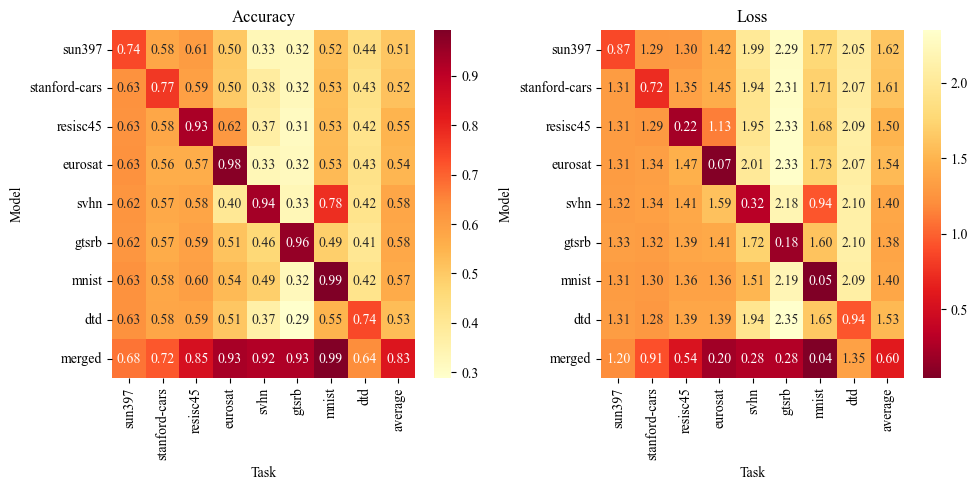

In [4]:
clip_vit_base_patch32_TA8_results = load_from_json(
    "results/clip-vit-base-patch32/TA8.json"
)
df = to_dataframe(clip_vit_base_patch32_TA8_results)
display(df)

plot_heatmap(df)

,model_name,task,accuracy,loss
0,sun397,sun397,0.716877,0.943026
1,sun397,stanford-cars,0.585002,1.273807
2,sun397,resisc45,0.604921,1.288372
3,sun397,eurosat,0.517407,1.388000
4,sun397,svhn,0.335971,1.989005
...,...,...,...,...
436,merged,fashion_mnist,0.846900,0.552166
437,merged,emnist_letters,0.387163,2.944138
438,merged,kmnist,0.490900,1.713725
439,merged,rendered-sst2,0.702910,0.723291


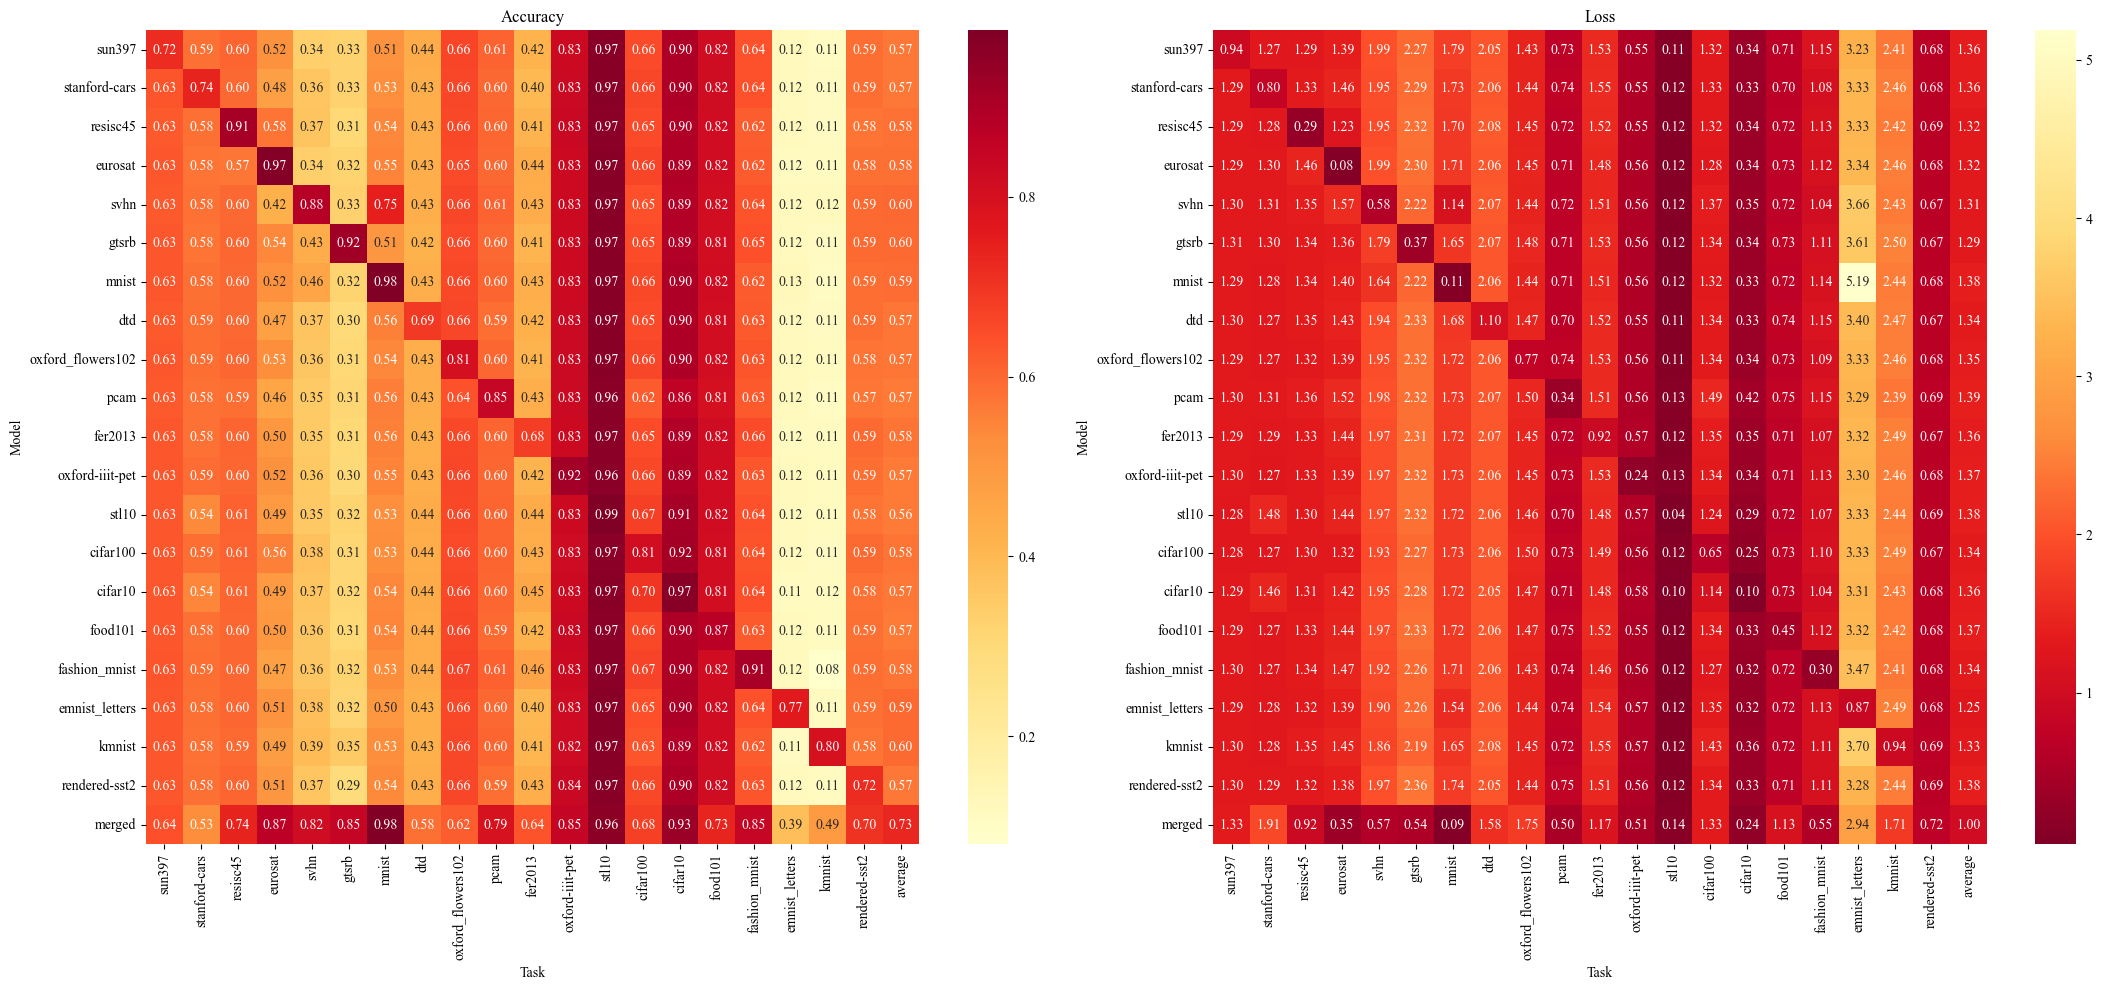

In [8]:
clip_vit_base_patch32_TALL20_results = load_from_json(
    "results/clip-vit-base-patch32/TALL20.json"
)
df = to_dataframe(clip_vit_base_patch32_TALL20_results)
display(df)

plot_heatmap(df, figsize=(22, 10))